# Investigation of AA + FMN + ALMA + PD(P)GD + DDN 
Mininal norm attacks added to AA suite

In [4]:
from logging_ import Logger
import matplotlib.pyplot as plt
import pandas as pd

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
logger = Logger(logs_dir="logs_art_add_all_to_aa")

In [6]:
logger.load_all()

# Metrics

In [7]:
report = logger.report()
report.reset_index(drop=True)

,dataset,norm,model,attack,steps,params,median,n_qs,asr
0,CIFAR10,L2,Engstrom2019Robustness_l2,ddn,101,-init_norm-1.0-loss_f-DL-steps-100-γ-0.05,0.844558,7.0,100.000000
1,CIFAR10,Linf,Rade2021Helper_R18_extra,aa,2,-eps-0.031373-loss_f-DL,inf,0.0,30.167598
2,CIFAR10,L2,Rebuffi2021Fixing_70_16_cutmix_ddpm,fmn,1001,-binary_search_steps-10-loss_f-DL-steps-1000-α...,1.155422,21.0,100.000000
3,CIFAR10,Linf,Engstrom2019Robustness_linf,fmn,101,-binary_search_steps-10-loss_f-DL-steps-100-α_...,0.035818,13.0,100.000000
4,CIFAR10,L1,Engstrom2019Robustness_l2,fmn,101,-binary_search_steps-10-loss_f-DL-steps-100-α_...,9.856852,37.0,92.307692
...,...,...,...,...,...,...,...,...,...
629,CIFAR10,L2,Rade2021Helper_R18_ddpm,ddn,101,-init_norm-0.1-loss_f-DL-steps-100-γ-0.05,1.115903,52.0,98.360656
630,CIFAR10,L2,Rebuffi2021Fixing_70_16_cutmix_ddpm,fmn,101,-binary_search_steps-10-loss_f-DL-steps-100-α_...,1.162410,20.0,100.000000
631,CIFAR10,L1,Engstrom2019Robustness_l2,apgd,1021,-binary_search_steps-10-loss_f-DL-max_eps-12.0...,8.953124,337.0,89.560439
632,CIFAR10,L2,Rebuffi2021Fixing_R18_cutmix_ddpm,fmn,101,-binary_search_steps-10-loss_f-DL-steps-100-α_...,1.113560,12.0,100.000000


# add ALL to AA

In [10]:
from scores import SCORES

norm = "L1"
## add ensemble for L1:
for model_name in SCORES[norm][0]:
    if "Xiao" in model_name:
        continue
    run_ids = list(logger.where(model=model_name).keys())
    logger.merge(f"dataset-CIFAR10-norm-{norm}-attack-ensemble-model-{model_name}-steps-1001", run_ids)    

In [11]:
from scores import SCORES

norm = "L2"
## add ensemble for L1:
for model_name in SCORES[norm][0]:
    if "Xiao" in model_name:
        continue
    run_ids = list(logger.where(model=model_name).keys())
    logger.merge(f"dataset-CIFAR10-norm-{norm}-attack-ensemble-model-{model_name}-steps-1001", run_ids)    

In [12]:
from scores import SCORES

norm = "Linf"
## add ensemble for L1:
for model_name in SCORES[norm][0]:
    if "Xiao" in model_name:
        continue
    run_ids = list(logger.where(model=model_name).keys())
    logger.merge(f"dataset-CIFAR10-norm-{norm}-attack-ensemble-model-{model_name}-steps-1001", run_ids)    

In [46]:
report = logger.report_ra(logger.where(norm="Linf"), eps=8/255+0.00001)
report.groupby(["model", "attack"])["rob_acc"].min()

model                                      attack  
Engstrom2019Robustness_linf                aa          0.505
                                           apgd        0.580
                                           ensemble    0.505
                                           fmn         0.525
                                           pdpgd       0.550
Gowal2020Uncovering_70_16_extra            aa          0.695
                                           apgd        0.695
                                           ensemble    0.695
                                           fmn         0.695
                                           pdpgd       0.695
Gowal2021Improving_70_16_ddpm_100m         aa          0.710
                                           apgd        0.730
                                           ensemble    0.710
                                           fmn         0.730
                                           pdpgd       0.730
Gowal2021Improving_R18_ddpm_100m 

In [47]:
print("Improvement in rob_acc over plain AA:")
report[report.attack == "aa"].groupby(["model"])["rob_acc"].min() - report.groupby(["model"])["rob_acc"].min()

Improvement in rob_acc over plain AA:


model
Engstrom2019Robustness_linf                  0.000
Gowal2020Uncovering_70_16_extra              0.000
Gowal2021Improving_70_16_ddpm_100m           0.000
Gowal2021Improving_R18_ddpm_100m             0.000
Kang2021Stable                                 NaN
Rade2021Helper_R18_extra                     0.005
Rebuffi2021Fixing_70_16_cutmix_extra_linf    0.000
Name: rob_acc, dtype: float64

In [48]:
report = logger.report_ra(logger.where(norm="L2"), eps=0.5+ 0.00001)
report.groupby(["model", "attack"])["rob_acc"].min()

model                                    attack  
Engstrom2019Robustness_l2                aa          0.700
                                         alma        0.705
                                         apgd        0.720
                                         ddn         0.710
                                         ensemble    0.700
                                         fmn         0.705
                                         pdgd        0.710
Gowal2020Uncovering_extra                aa          0.825
                                         alma        0.825
                                         apgd        0.835
                                         ddn         0.845
                                         ensemble    0.825
                                         fmn         0.830
                                         pdgd        0.830
Rade2021Helper_R18_ddpm                  aa          0.800
                                         alma        0.800
      

In [49]:
print("Improvement in rob_acc over plain AA:")
report[report.attack == "aa"].groupby(["model"])["rob_acc"].min() - report.groupby(["model"])["rob_acc"].min()

Improvement in rob_acc over plain AA:


model
Engstrom2019Robustness_l2                  0.0
Gowal2020Uncovering_extra                  0.0
Rade2021Helper_R18_ddpm                    0.0
Rebuffi2021Fixing_70_16_cutmix_ddpm        0.0
Rebuffi2021Fixing_70_16_cutmix_extra_l2    0.0
Rebuffi2021Fixing_R18_cutmix_ddpm          0.0
Name: rob_acc, dtype: float64

In [50]:
report = logger.report_ra(logger.where(norm="L1"), eps=8+ 0.00001)
report.groupby(["model", "attack"])["rob_acc"].min()

model                                attack  
Augustin2020Adversarial_34_10_extra  aa          0.575
                                     alma        0.650
                                     apgd        0.665
                                     ensemble    0.570
                                     fmn         0.620
                                     pdpgd       0.665
Engstrom2019Robustness_l2            aa          0.495
                                     alma        0.560
                                     apgd        0.550
                                     ensemble    0.000
                                     fmn         0.515
                                     pdpgd       0.580
Engstrom2019Robustness_linf          aa          0.170
                                     alma        0.265
                                     apgd        0.345
                                     ensemble    0.000
                                     fmn         0.210
                   

In [51]:
print("Improvement in rob_acc over plain AA:")
report[report.attack == "aa"].groupby(["model"])["rob_acc"].min() - report.groupby(["model"])["rob_acc"].min()

Improvement in rob_acc over plain AA:


model
Augustin2020Adversarial_34_10_extra    0.005
Engstrom2019Robustness_l2              0.495
Engstrom2019Robustness_linf            0.170
Maini2020MultipleAVG                   0.020
Maini2020MultipleMSD                   0.000
Rice2020Overfitting                    0.000
Xiao2020Enhancing                      0.000
Name: rob_acc, dtype: float64

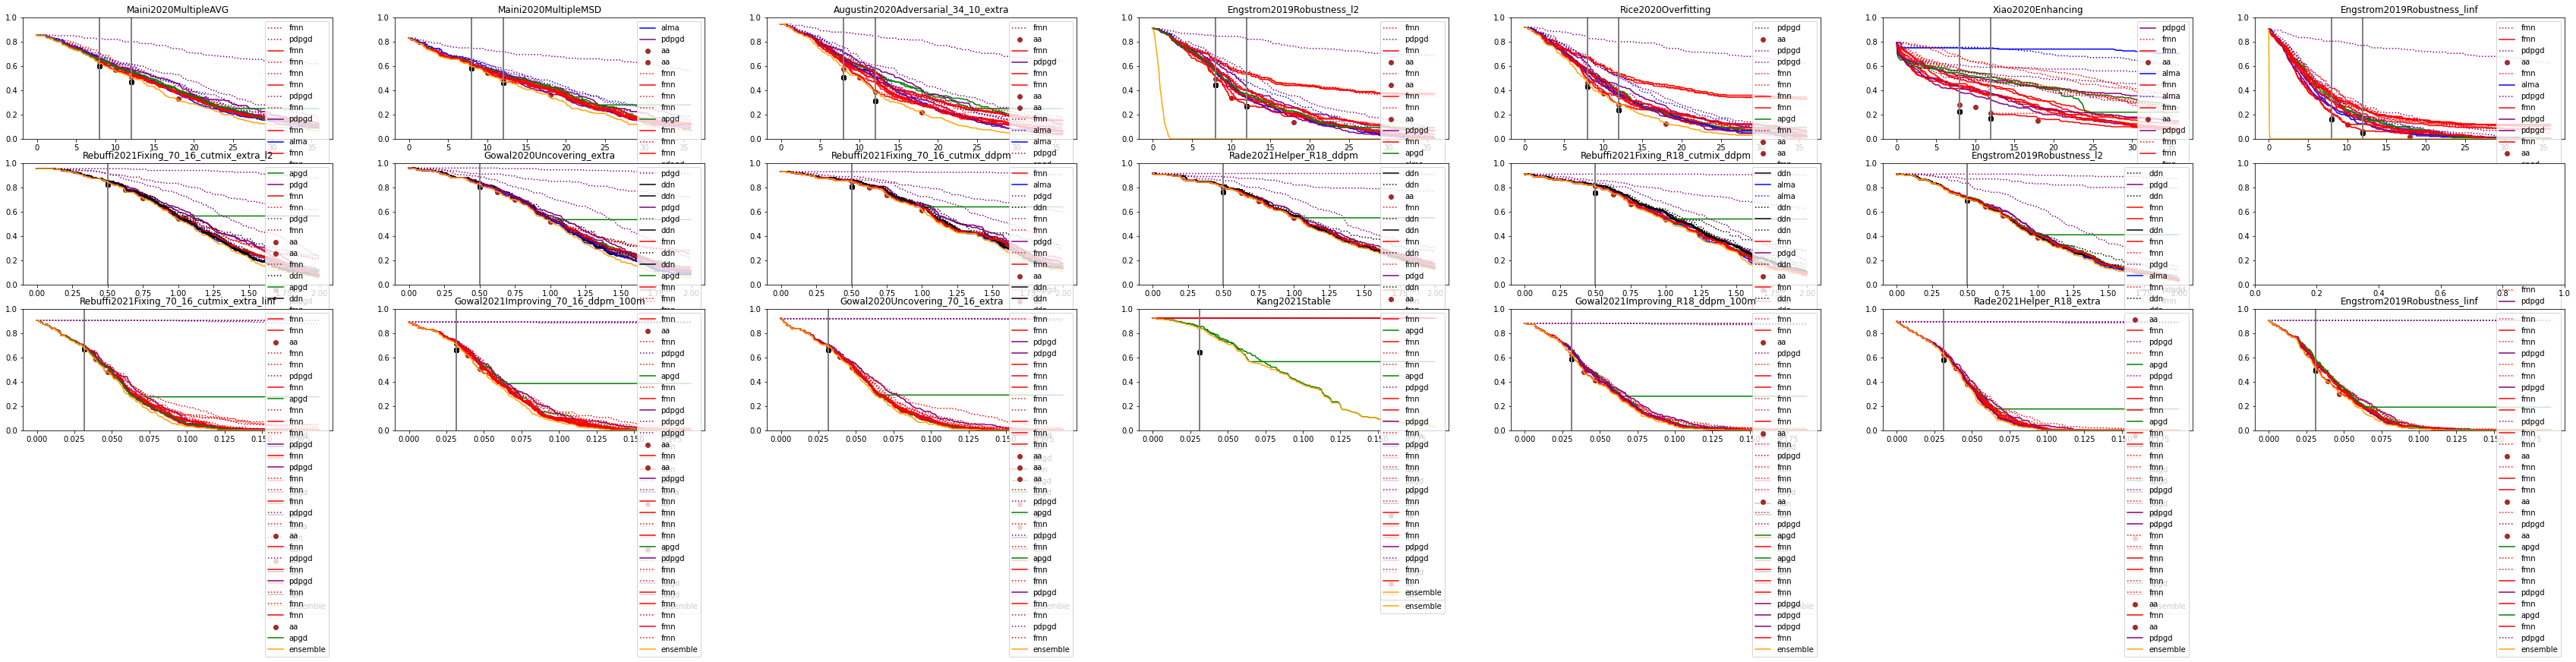

In [13]:
logger.plot_SE_grid(where_settings={}, figsize=(60,10))